# DSA4262 Data Visualization Individual Assignment 1 

## Visualizations Code

Cheryl Lee (Li Jia Xuan) A0262272J

## Plot 1: Macro 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Assignment 1/data/IHME-GBD_2023_DATA-71f9759e-1.csv", header=0) 
df.head()


,population_group_id,population_group_name,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,All Population,5,Prevalence,1,Global,1,Male,7,10-14 years,571,Anxiety disorders,3,Rate,2023,7310.302708,14336.062709,3229.477675
1,1,All Population,5,Prevalence,1,Global,2,Female,7,10-14 years,571,Anxiety disorders,3,Rate,2023,10901.056020,20557.221623,4655.254622
2,1,All Population,5,Prevalence,1,Global,3,Both,7,10-14 years,571,Anxiety disorders,3,Rate,2023,9052.990069,17316.550991,3916.036618
3,1,All Population,5,Prevalence,1,Global,1,Male,8,15-19 years,571,Anxiety disorders,3,Rate,2023,5867.055276,10156.975196,3269.565360
4,1,All Population,5,Prevalence,1,Global,2,Female,8,15-19 years,571,Anxiety disorders,3,Rate,2023,9431.009903,15507.255191,5446.208789


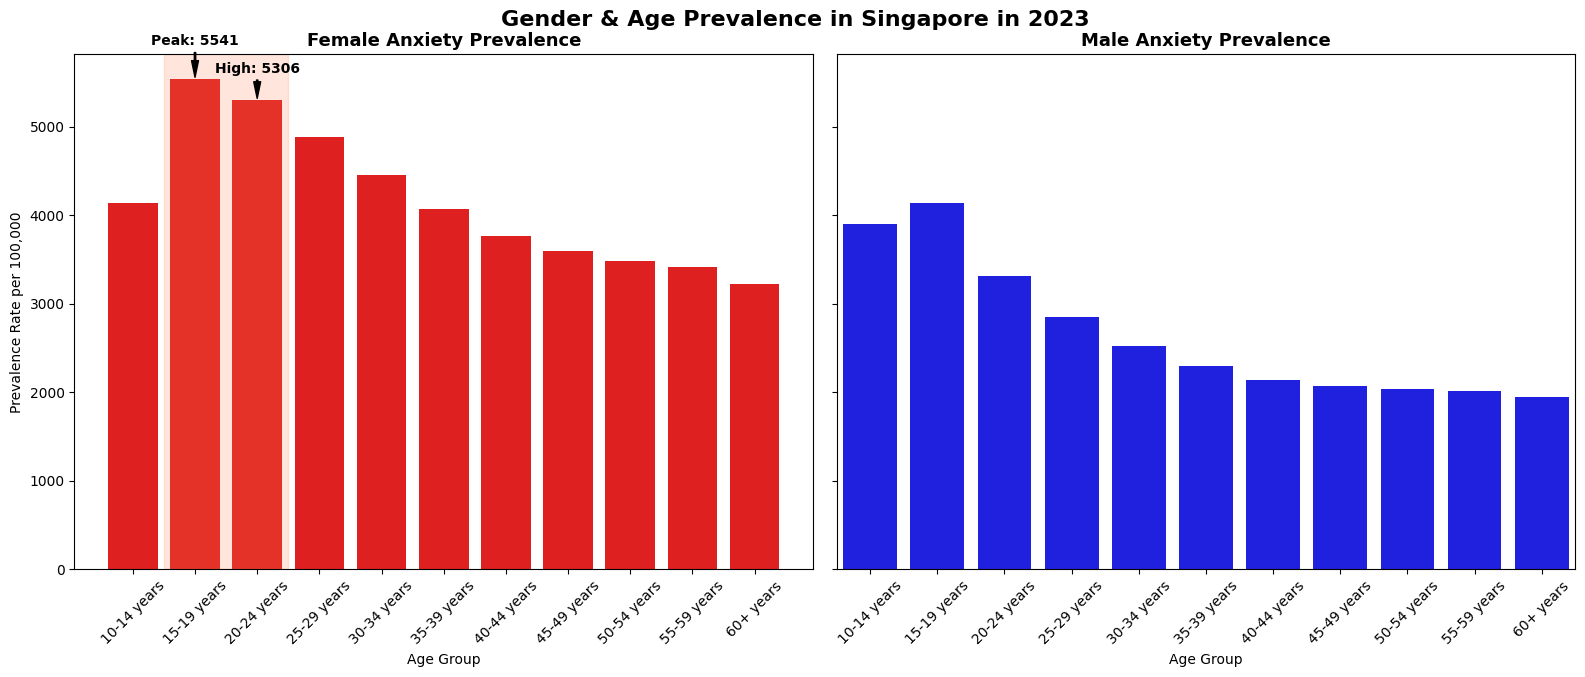

In [3]:
plot1_data = df[(df['location_name'] == 'Singapore') &
                (df['age_name'] != 'All ages') & (df['sex_name'].isin(['Male', 'Female']))]

age_order = ['10-14 years', '15-19 years', '20-24 years', '25-29 years', '30-34 years', 
             '35-39 years', '40-44 years', '45-49 years', '50-54 years', '55-59 years', '60+ years']

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

sns.barplot(data=plot1_data[plot1_data['sex_name'] == 'Female'], 
            x='age_name', y='val', order=age_order, ax=axes[0], color='red')
axes[0].set_title('Female Anxiety Prevalence', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Prevalence Rate per 100,000')
axes[0].set_xlabel('Age Group')

axes[0].axvspan(0.5, 2.5, color='coral', alpha=0.2) #highlight the youth spike window

peak = plot1_data[(plot1_data['sex_name'] == 'Female') & (plot1_data['age_name'] == '15-19 years')]['val'].values[0]
high = plot1_data[(plot1_data['sex_name'] == 'Female') & (plot1_data['age_name'] == '20-24 years')]['val'].values[0]

axes[0].annotate(f'Peak: {peak:.0f}', xy=(1, peak), xytext=(1, peak + 380),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 fontsize=10, fontweight='bold', ha='center')

axes[0].annotate(f'High: {high:.0f}', xy=(2, high), xytext=(2, high + 300),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 fontsize=10, fontweight='bold', ha='center')

sns.barplot(data=plot1_data[plot1_data['sex_name'] == 'Male'], 
            x='age_name', y='val', order=age_order, ax=axes[1], color='blue')
axes[1].set_title('Male Anxiety Prevalence', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Age Group') 

plt.suptitle('Gender & Age Prevalence in Singapore in 2023', fontsize=16, fontweight='bold', y=0.96)
plt.tight_layout()
plt.savefig('plot1_macro.png')


## Plot 2: Micro 

Note: The data used for the following visualisation were manually transcribed from Table 5 of'Examining psychological distress among youth in Singapore: Insights from the National Youth Mental Health Study' (Samari et al., 2025), as the original dataset was not available for direct download.

In [4]:
plot2_data = {
    "Factor": [
        "Cyberbullying",
        "Body Concern: Mild",
        "Body Concern: Moderate",
        "Body Concern: Marked",
        "Daily Smoking",
        "Alcohol: Likely Dependence",
        "Self-Esteem"
    ],
    "OR": [
        1.4,
        1.6,
        2.2,
        3.2,
        1.7,
        2.3,
        0.8
    ]
}

df2 = pd.DataFrame(plot2_data)
df2.head()


,Factor,OR
0,Cyberbullying,1.4
1,Body Concern: Mild,1.6
2,Body Concern: Moderate,2.2
3,Body Concern: Marked,3.2
4,Daily Smoking,1.7


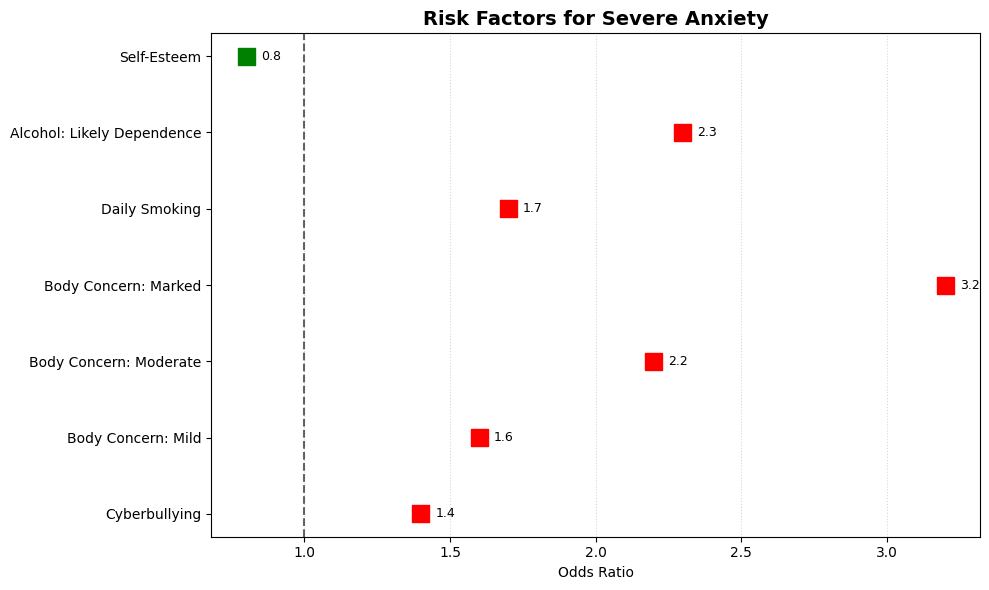

In [5]:
df2["Factor"] = pd.Categorical(
    df2["Factor"],
    categories=plot2_data["Factor"],
    ordered=True
)
df2 = df2.sort_values("Factor")

df2["Type"] = df2["OR"].apply(lambda x: "Protective" if x < 1 else "Risk")
colors = df2["Type"].map({"Protective": "green", "Risk": "red"}).tolist()

plt.figure(figsize=(10, 6))
plt.scatter(df2["OR"], df2["Factor"], color=colors, s=150, marker="s", zorder=3)
plt.axvline(1, color="black", linestyle="--", alpha=0.6)

plt.title("Risk Factors for Severe Anxiety", fontsize=14, fontweight="bold")
plt.xlabel("Odds Ratio")
plt.grid(axis="x", linestyle=":", alpha=0.5)

for _, row in df2.iterrows():
    plt.text(row["OR"] + 0.05, row["Factor"], f'{row["OR"]:.1f}', va="center", fontsize=9)

plt.tight_layout()
plt.savefig("plot2_micro.png")
plt.show()

## Plot 3: Actionable 

Note: The data used for the following visualisation were manually transcribed from Table 2 of'Gender-based analysis of body dissatisfaction among youths in Singapore: findings from the National Youth Mental Health Study' (Subramaniam et al., 2025), as the original dataset was not available for direct download.

In [6]:
plot3_data = {
    'Category': [
        'Age 15-19', 'Age 20-24', 'Age 25-29', 
        'Malay', 'Indian', 'Chinese',
        'Secondary School', 'Vocational/Tech', 'University',
        'Income <$5k', 'Income >$20k', 'Economically Inactive'
    ],
    'Prevalence': [35.4, 32.0, 27.4, 33.7, 34.3, 22.4, 35.3, 32.0, 20.9, 27.9, 33.5, 31.9],
    'Group': ['Age', 'Age', 'Age', 'Ethnicity', 'Ethnicity', 'Ethnicity', 'Education', 'Education', 'Education', 'Socio-Econ', 'Socio-Econ', 'Socio-Econ']
}

df3 = pd.DataFrame(plot3_data)
df3.head()

,Category,Prevalence,Group
0,Age 15-19,35.4,Age
1,Age 20-24,32.0,Age
2,Age 25-29,27.4,Age
3,Malay,33.7,Ethnicity
4,Indian,34.3,Ethnicity


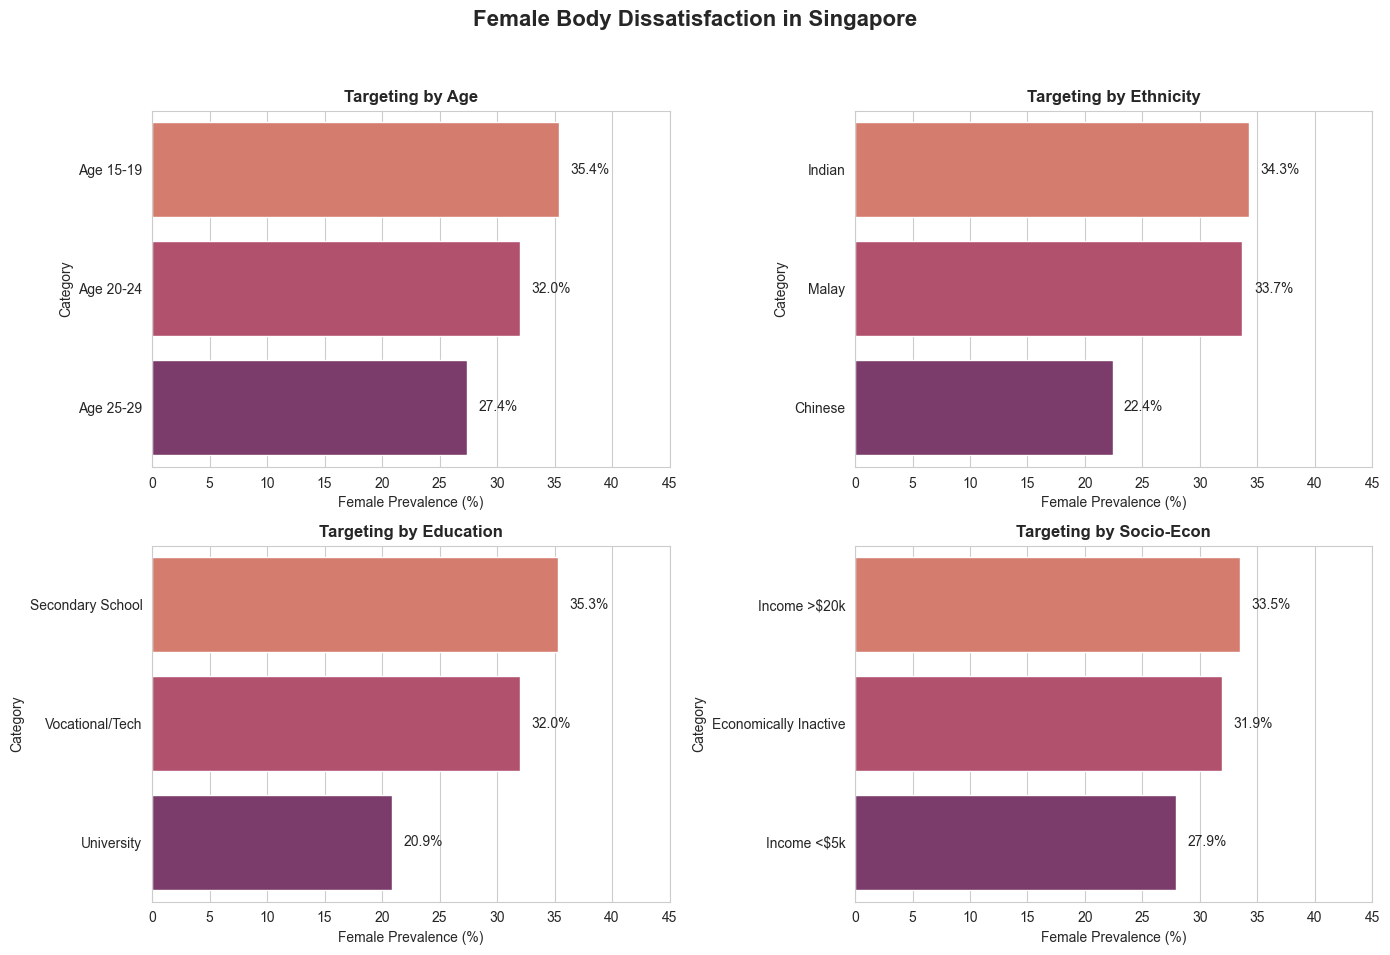

In [7]:
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

for i, group in enumerate(['Age', 'Ethnicity', 'Education', 'Socio-Econ'], 1):
    plt.subplot(2, 2, i)
    subset = df3[df3['Group'] == group].sort_values('Prevalence', ascending=False)

    ax = sns.barplot(
        x='Prevalence',
        y='Category',
        hue='Category',
        data=subset,
        palette='flare',
        legend=False
    )

    plt.title(f'Targeting by {group}', fontweight='bold')
    plt.xlabel('Female Prevalence (%)')
    plt.xlim(0, 45)

    for p in ax.patches:
        ax.annotate(
            f'{p.get_width()}%',
            (p.get_width() + 1, p.get_y() + p.get_height() / 2),
            va='center'
        )

plt.suptitle('Female Body Dissatisfaction in Singapore', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plot3_actionable.png')


## References
Global Burden of Disease Collaborative Network. (2024). Global Burden of Disease Study 2023 (GBD 2023) results. Institute for Health Metrics and Evaluation. https://vizhub.healthdata.org/gbd-results/

Samari, E., Vaingankar, J. A., Tan, B., Chang, S., Tan, Y. W. B., Archana, S., Chua, Y. C., Tang, C., Lee, Y. P., Chew, C. S. E., Davis, C., & Subramaniam, M. (2025). Gender-based analysis of body dissatisfaction among youths in Singapore: Findings from the National Youth Mental Health Study. Frontiers in Psychiatry. https://pmc.ncbi.nlm.nih.gov/articles/PMC12061987/

Subramaniam, M., Vaingankar, J., Tan, B., Abdin, E., Chang, S., Tan, Y., Samari, E., Archana, S., Chua, Y., Lee, J., Tang, C., Lee, Y., Chong, S., & Verma, S. (2025). Examining psychological distress among youth in Singapore: Insights from the National Youth Mental Health Study. Asian Journal of Psychiatry, 105, 104405. https://doi.org/10.1016/j.ajp.2025.104405
